Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


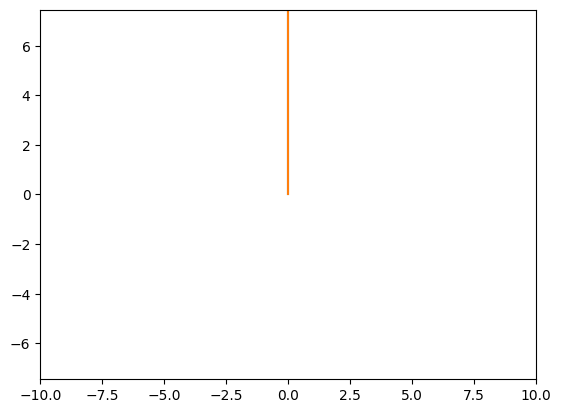

In [12]:
import matplotlib.pyplot as plt
from numpy import  array, zeros, concatenate, linalg, any, linspace, shape


def F1(U): 
    F = zeros(2)
    F[0] = U[0]*(1 - U[1])  
    F[1] = U[1]
    return F

def RangeKutta4(U,t1,t2,F):

    dt = t2 - t1
    k1 = F(U)
    k2 = F(U + (dt/2)*k1)
    k3 = F(U + (dt/2)*k2)
    k4 = F(U + (dt)*k3)
    return U + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

def Cauchy_Problem(F,U0,t,Temporal_scheme):  #F: Funcion Rn,  #U0: vector Rn, #T: Tiempo
                                            
    N = len(t) - 1     #Número de intervalos temporales
    Nv = len(U0)         #Número de variables
    U = zeros((N+1,Nv))
    U[0,:] = U0

    for n in range(N):
        U[n+1,:] = Temporal_scheme(U[n,:],t[n],t[n+1],F)    #Respetamos la API
    return U


def Cauchy_Error(F,U0,t,Temporal_scheme):  #F: Funcion Rn,  #U0: vector Rn, #t: Tiempo

    Nt = len(t)
    Nv = len(U0)
            #Nt, Nv = shape(U1)
    E = zeros((Nt,Nv))

    t1 = t[:]
    t2 = linspace(t[0], t[Nt-1], 2*(Nt))

    U1 = Cauchy_Problem(F,U0,t1,Temporal_scheme)  #Solucion del problema de Cauchy en la malla 1
    U2 = Cauchy_Problem(F,U0,t2,Temporal_scheme)  #Solucion del problema de Cauchy en la malla 2

    q = 1


    for n in range(Nt):
        E[n,:] = (U2[2*n,:] - U1[n,1])/(1-1/2**q)

    return U1, E


U0 = array([0,0])   #Condiciones iniciales

t0 = 0
tf = 10
np = 1000

lim = 1

t = linspace(t0, tf, np)

U1, E = Cauchy_Error(F1,U0,t,RangeKutta4)

plt.axis("equal")
plt.plot(E[:,:], t)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()







In [ ]:
def Cauchy_Error(F,U0,t,Temporal_scheme,q):

    N = len(t) - 1
    Nv = len(U0)

    E = zeros((N+1, Nv))
    t1 = t[:]
    t2 = linspace(t[0], t[N],  2*N+1)

    U1 = Cauchy_problem(F,U0,t1,Temporal_scheme)
    U2 = Cauchy_problem(F,U0,t2,Temporal_scheme)

    for n in range(0,N+1):
        E[n,:] = (U2[2*n,:] - U1[n,:])/(1 - 1/2**q)

    return U1, E

In [ ]:
def Convergence_rate(Temporal_scheme, F, U0,t):

    Nm = 5   #Número de mallas a analizar
    N_mesh = array([10, 20, 40, 60, 80])

    E = zeros(Nm)
    logN = zeros(Nm)
    logE = zeros(Nm)
    N = len(t)
    for n in range(Nm):
        t_n = linspace(t[0], t[N], N_mesh[n])
        U1, E = Cauchy_Error(F,U0,t,Temporal_scheme,q)

    logN = log(N)
    logE = log(E)